## Оцінка та покращення якості моделей

In [1]:
%pip install -U scikit-learn
%pip install mglearn
%pip install --upgrade joblib==1.1.0

     ---------------------------------------- 7.5/7.5 MB 5.3 MB/s eta 0:00:00
     ---------------------------------------- 14.6/14.6 MB 4.3 MB/s eta 0:00:00
     -------------------------------------- 39.9/39.9 MB 957.1 kB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 9.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     -------------------------------------- 540.1/540.1 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 7.2/7.2 MB 8.4 MB/s eta 0:00:00
     ---------------------------------------- 10.3/10.3 MB 7.4 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 8.3 MB/s eta 0:00:00
     ---------------------------------------- 3.4/3.4 MB 6.5 MB/s eta 0:00:00
     -------------------------------------- 163.6/163.6 kB 9.6 MB/s eta 0:00:00
     -------------------------------------- 965.4/965.4 kB 6.1 MB/s eta 0:00:00
     ---------------------------------------- 55.4/55.4 kB ? eta 0:00:00
     -------------------------------------- 498.1/498.1 kB 3.9 MB/s eta 0:00:00
  Running setup.py install for mglearn: started
  Running setup.py install for mglearn: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  DEPRECATION: mglearn is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559

[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ------------------------------------ 307.0/307.0 kB 862.5 kB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# у разі виникнення помилки, перевантажте ядро Jupyter
import mglearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


Аж до теперішнього моменту для оцінки якості моделі ми розбивали наші дані на навчальний та тестовий набори за допомогою функції` train_test_split`, будували модель на навчальній вибірці, викликавши метод `fit`, та оцінювали її якість на тестовому наборі, використовуючи метод `score`, який для класифікації обчислює частку правильно класифікованих прикладів.

In [3]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# створюємо новий синтетичний датасет
X, y = make_blobs(random_state=0)
# розділяємо дані на навчальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# cтворюємо об'єкт моделі та проводимо навчання
logreg = LogisticRegression().fit(X_train, y_train)
# оцінюємо модель на тестовій вибірці
print("Test set score: {:.2f}".format(logreg.score(X_test, y_test)))

Test set score: 0.88


Згадаймо, що причина, через яку ми розбиваємо наші дані на навчальний та тестовий набори, полягає в тому, що нас цікавить, наскільки добре наша модель **узагальнює** результат на нові, раніше невідомі дані. Нас цікавить не якість припасування моделі до навчальних даних, а правильність її прогнозів для даних, які не брали участь у навчанні.

### Крос-валідація (перехресна перевірка)

**Перехресна перевірка** являє собою статистичний метод оцінки узагальнюючої здатності, який є більш стійким та ґрунтовним, ніж розбиття даних на навчальний та тестовий набори. 

У перехресній перевірці дані розбиваються кілька разів, і будується кілька моделей. Найбільш часто використовуваний варіант перехресної перевірки – `k`-блочна крос-валідація (k-fold cross-validation), в якій `k` – це число, що задається користувачем, як правило, 5 або 10. При виконанні п'ятиблочної перехресної перевірки дані спочатку розбиваються на п'ять частин (приблизно) однакового розміру, які називаються **блоками** (**folds**). Потім будується послідовність моделей. 

Перша модель навчається, використовуючи блок 1 в якості тестового набору, інші блоки (2-5) виконують роль навчального набору. Модель будується на основі даних, розташованих у блоках 2-5, а потім даних блоку 1 оцінюється її правильність. Потім відбувається навчання другої моделі, цього разу в якості тестового набору використовується блок 2, а дані в блоках 1, 3, 4 і 5 служать навчальним набором. Цей процес повторюється для блоків 3, 4 та 5, що виконують роль тестових наборів. Для кожного з цих п'яти розбиттів (splits) даних на навчальний та тестовий набори ми обчислюємо правильність. У результаті ми зафіксували п'ять значень правильності

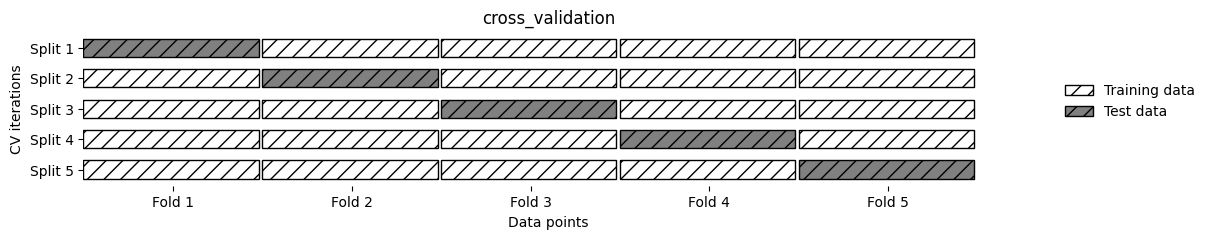

In [4]:
mglearn.plots.plot_cross_validation()

#### Крос-валідація у scikit-learn

У scikit-learn перехресна перевірка реалізована за допомогою функції `cross_val_score` модуля `model_selection`. Аргументами функції `cross_val_score` є модель, що оцінюється, навчальні дані і фактичні мітки. Оцінимо якість моделі `LogisticRegression` на наборі даних `iris`.

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression(max_iter=1000)

scores = cross_val_score(logreg, iris.data, iris.target)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]


За замовченням `cross_val_score` виконує п'тиблочну перехресну перевірку, повертаючи три значення правильності. Ми можемо змінити кількість блоків, задавши інше значення параметра `cv`:

In [6]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=10)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [1.         0.93333333 1.         1.         0.93333333 0.93333333
 0.93333333 1.         1.         1.        ]


Найпоширеніший спосіб підсумувати правильність, обчислену під час перехресної перевірки, – це обчислення середнього значення:

In [7]:
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.97


Функція `cross_validate` модуля `model_selection` дозволяє отримати детальну інформацію щодо показників при крос-валідації

In [8]:
from sklearn.model_selection import cross_validate
res = cross_validate(logreg, iris.data, iris.target, cv=5,
                     return_train_score=True)
display(res)

{'fit_time': array([0.01598668, 0.02398348, 0.01598907, 0.01602435, 0.0159936 ]),
 'score_time': array([0., 0., 0., 0., 0.]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.98333333, 0.98333333, 0.975     ])}

Далі можна обчислити середні значення для кожної перевірки.

In [9]:
res_df = pd.DataFrame(res)
display(res_df)
print("Mean times and scores:\n", res_df.mean())

,fit_time,score_time,test_score,train_score
0,0.015987,0.0,0.966667,0.966667
1,0.023983,0.0,1.000000,0.966667
2,0.015989,0.0,0.933333,0.983333
3,0.016024,0.0,0.966667,0.983333
4,0.015994,0.0,1.000000,0.975000


Mean times and scores:
 fit_time       0.017595
score_time     0.000000
test_score     0.973333
train_score    0.975000
dtype: float64


#### Переваги перехресної перевірки

У порівнянні з одноразовим розбиттям даних на навчальний та тестовий набори використання перехресної перевірки має декілька переваг. 

По-перше, пригадаємо, що `train_test_split` виконує випадкове розбиття даних. Уявіть собі, що при виконанні випадкового розбиття даних нам «пощастило», і всі приклади, що важко класифікуються, в кінцевому підсумку потрапили в навчальний набір. В цьому випадку в тестовий набір потраплять лише «легкі» приклади, і правильність на тестовому наборі буде неймовірно високою. І, навпаки, якщо нам «не пощастило», всі приклади, що важко класифікуються, потрапляють у тестовий набір і тому ми отримуємо неправдоподібно низьку правильність. Однак при використанні перехресної перевірки на кожній ітерації тестовий набір, що використовується для перевірки моделі, потрапляють різні приклади. Таким чином, модель повинна добре узагальнювати всі приклади в наборі даних, щоб усі значення правильності (або їхнє середнє) були високими.

Крім того, наявність кількох розбиття дає певну інформацію про те, наскільки наша модель чутлива до вибору навчального набору даних. Для набору даних `iris` ми побачили розкид значень правильності від `90%` до `100%`. Це досить широкий діапазон значень і він дозволяє нам судити про те, як модель працюватиме в гіршому і кращому випадку, коли ми застосуємо її до нових даних.

Ще одна перевага перехресної перевірки, порівняно з одноразовим розбиттям даних, полягає в тому, що ми використовуємо наші дані більш ефективно. Застосовуючи `train_test_split`, ми зазвичай використовуємо `75%` даних для навчання та `25%` даних для оцінки якості.

Застосовуючи п'ятиблочну перехресну перевірку, на кожній ітерації для припасування моделі ми можемо використовувати `4/5` даних (`80%`). При використанні 10-блокової перехресної перевірки ми можемо використовувати для припасування моделі `9/10` даних (`90%`). Більший обсяг даних, як правило, призводить до побудови точніших моделей.

Основний недолік перехресної перевірки – збільшення вартості обчислень. Оскільки тепер ми навчаємо `k` моделей замість однієї моделі, перехресна перевірка буде виконуватися приблизно в k разів повільніше ніж одноразове розбиття даних.

> Важливо пам'ятати, що крос-валідація не є способом побудови моделі, яку можна застосувати до нових даних. Перехресна перевірка не повертає моделі. При виклику `cross_val_score` будується кілька внутрішніх моделей, проте мета перехресної перевірки полягає лише в тому, щоб оцінити узагальнюючу здатність даного алгоритму, навчивши певний набір даних.

### Стратифікована k-блочна перехресна перевірка та інші стратегії

Описане у попередньому розділі розбиття даних на `k` блоків, починаючи з першого `k` блоку, не завжди є гарною ідеєю. Для прикладу давайте подивимося на набір даних `iris`:

In [10]:
from sklearn.datasets import load_iris
iris = load_iris()
print("Iris labels:\n{}".format(iris.target))

Iris labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Як видно, перша третина даних – це клас `0`, друга третина – клас `1`, а остання третина – клас `2`. Уявіть, що зробить із цим набором даних триблочна перехресна перевірка. Перший блок складатиметься з прикладів, що стосуються тільки класу `0`, тому при першому розбитті даних тестовий набір стане повністю класом `0`, а навчальний набір міститиме приклади, що стосуються тільки класів `1` і `2`. Оскільки класи в навчальному та тестовому наборах будуть різними в всіх трьох розбиттях, правильність триблочної перехресної перевірки для цього набору даних дорівнюватиме нулю. Цей сценарій не є оптимальним, оскільки для набору даних iris ми можемо отримати правильність суттєво вище за `0%`.

Оскільки звичайна `k`-блочна стратегія в цьому випадку зазнає невдачі, замість неї бібліотека `scikit-learn` пропонує використовувати для класифікації **стратифіковану k-блочну перехресну перевірку** (**stratified k-fold cross-validation**). У стратифікованій перехресній перевірці ми розбиваємо дані таким чином, щоб пропорції класів у кожному блоці точно відповідали пропорціям класів у наборі даних, як це показано на рисунку нижче.

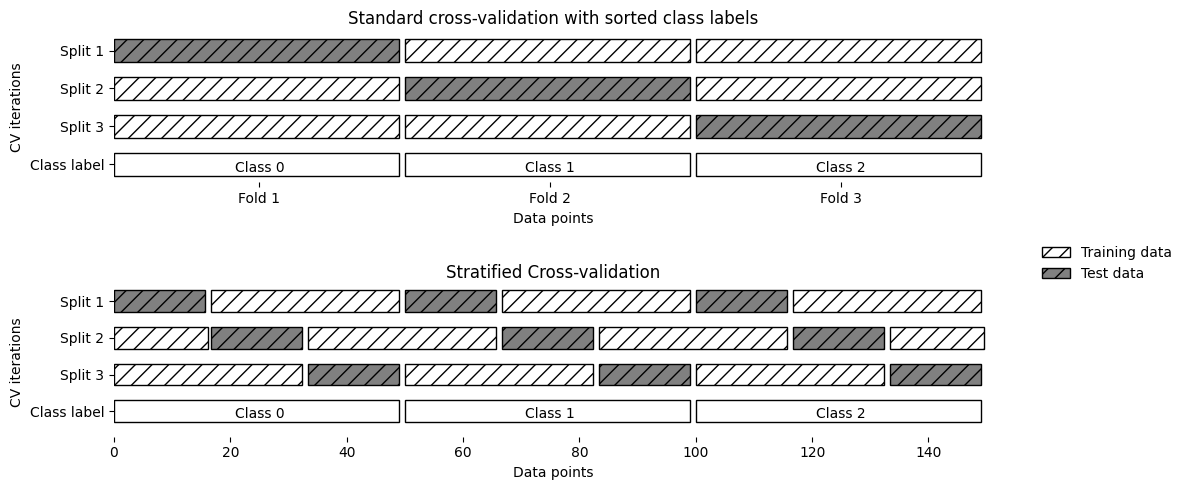

In [11]:
mglearn.plots.plot_stratified_cross_validation()

Наприклад, якщо `90%` прикладів належать до класу `А`, а `10%` прикладів – до класу `В`, то стратифікована перехресна перевірка виконується так, щоб у кожному блоці `90%` прикладів належали до класу `А`, а `10%` прикладів – до класу `B`.

Використання для оцінки класифікатора стратифікованої k-блокової перехресної перевірки замість звичайної k-блокової перехресної є гарною ідеєю, оскільки дозволяє отримати більш надійні оцінки узагальнюючої здатності. У ситуації, коли лише `10%` прикладів належать до класу `В`, використання стандартної k-блокової перехресної перевірки може призвести до того, що один з блоків повністю складатиметься з прикладів, що відносяться до класу `А`. Використання цього блоку в якості тестового набору не дасть особливої інформації щодо якості роботи класифікатора.

Для регресії у `scikit-learn` за умовчанням використовується стандартна k-блочна крос-перевірка. Можна було б ще спробувати створити блоки, що становлять різні значення кількісної залежної змінної, але цей метод не є загальнопоширеною стратегією і був би несподіванкою для більшості користувачів.

#### Різні стратегії крос-валідації

Раніше ми вже бачили, що можна налаштувати кількість блоків, використовувану в `cross_val_score`, за допомогою параметра `cv`. Однак `scikit-learn` дозволяє значно точніше налаштувати процес перехресної перевірки, використовуючи як параметр `cv` **генератор розбиття перехресної перевірки** (**cross-validation splitter**).

У більшості випадків значення параметрів, виставлені за умовчанням для k-блокової перехресної перевірки у разі регресії та стратифікованої k-блокової перевірки у разі класифікації дають хороші результати, проте бувають ситуації, коли ви, можливо, захочете використати іншу стратегію. Допустимо, ми хочемо застосувати k-блочну перехресну перевірку до класифікаційного набору даних, щоб відтворити чиїсь результати. Для цього ми повинні спочатку імпортувати клас `KFold` з модуля `model_selection` і створити його екземпляр, задавши потрібну кількість блоків

In [12]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

Потім ми можемо передати генератор розбиття `kfold` як параметр `cv` у функцію `cross_val_score`.

In [13]:
print("Cross-validation scores:\n{}".format(
      cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[1.         1.         0.86666667 0.93333333 0.83333333]


Таким чином, ми можемо переконатися, що використання триблочної (нестратифікованої) перехресної перевірки для набору даних `iris` дійсно є дуже поганою ідеєю

In [14]:
kfold = KFold(n_splits=3)
print("Cross-validation scores:\n{}".format(
    cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[0. 0. 0.]


Згадаймо, що в наборі даних `iris` кожен блок відповідає одному класу і тому, застосувавши нестратифіковану перехресну перевірку, ми нічого не зможемо дізнатися про правильність моделі.

Ще один спосіб розв'язання цієї проблеми полягає в тому, щоб замість стратифікації перемішати дані і тим самим порушити порядок сортування прикладів, який визначається їх мітками. Ми можемо це зробити, передавши генератору `KFold` параметр `shuffle=True`. Якщо ми перемішуємо дані, необхідно зафіксувати `random_state`, щоб відтворити результат перемішування.

В іншому випадку кожен прогін `cross_val_score` даватиме різний результат, оскільки кожен раз використовується різне розбиття (це не є проблемою, але може призвести до несподіваних результатів). Перемішування даних перед їх розбиттям дає набагато кращий результат

In [15]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("Cross-validation scores:\n{}".format(
    cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[0.98 0.96 0.96]


#### Перехресна перевірки з винятком по одному (Leave-one-out cross-validation)

Ще один метод перехресної перевірки, що часто використовується, - **виняток по одному** (**leave-one-out**). Перехресну перевірку з винятком по одному можна подати у вигляді k-блокової перехресної перевірки, в якій кожен блок є окремим прикладом. По кожному розбиттю ви вибираєте одну точку даних як тестовий набір. Цей вид перевірки може займати дуже багато часу, особливо при роботі з великими наборами даних, однак іноді дозволяє отримати більш точні оцінки на невеликих наборах даних:

In [16]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("Number of cv iterations: ", len(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))

Number of cv iterations:  150
Mean accuracy: 0.97


#### Перехресна перевірка за випадковими перестановками під час розбиття (Shuffle-split cross-validation)

Ще однією гнучкою стратегією перехресної перевірки є перехресна перевірка **з випадковими перестановками при розбитті** (**shuffle-split cross-validation**). У цьому виді перевірки кожне розбиття вибирає `train_size` точок для навчального набору і `test_size` точок для тестового набору (при цьому навчальне та тестове підмножини не перетинаються).

Точки вибираються із поверненням. Розбиття повторюється `n_iter` разів. Рисунок нижче ілюструє чотирипрохідне розбиття набору даних, що складається з 10 точок, на навчальний набір з 5 точок і тестовий набір з 2 точок (щоб задати абсолютні розміри цих підмножин ви можете використовувати для `train_size` і `test_size` цілочисельні значення, чи числа з плаваючою точкою, щоб задати від загальної вибірки)

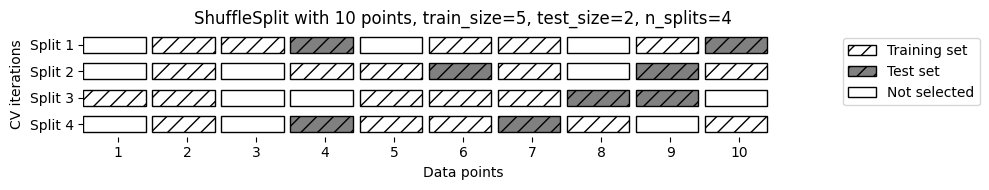

In [17]:
mglearn.plots.plot_shuffle_split()

Програмний код, наведений нижче, 10 разів розбиває дані на 50% навчальний набір і 50% тестовий набір

In [18]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[0.97333333 0.97333333 0.96       0.97333333 0.97333333 0.97333333
 0.97333333 0.97333333 0.92       0.94666667]


Перехресна перевірка з випадковими перестановками при розбитті дозволяє задавати кількість ітерацій незалежно від розмірів навчального та тестового наборів, що може бути корисно. Крім того, цей метод дозволяє використовувати на кожній ітерації лише частину даних (значення `train_size` та `test_size` необов'язково мають у сумі давати 1). Подібне проріджування даних може бути корисним при роботі з великими наборами даних.

Існує також стратифікований варіант `ShuffleSplit`, названий `StratifiedShuffleSplit`, який дозволяє отримати більш надійні результати під час вирішення завдань класифікації.

##### Перехресна перевірка з використанням груп (Cross-validation with groups)

Ще одна досить поширене налаштування для перехресної перевірки застосовується, коли дані містять взаємопов'язані між собою групи. 

Припустимо, ви хочете побудувати систему розпізнавання емоцій за фотографіями облич і для цього ви зібрали набір зображень 100 осіб, в якому кожна людина сфотографована кілька разів, щоб зафіксувати різні емоції. Мета полягає в тому, щоб побудувати класифікатор, який зможе правильно визначити емоції людей, які не включені в цей набір зображень. 

В даному випадку для оцінки якості роботи класифікатора можна використовувати традиційну стратифіковану перехресну перевірку. Однак, цілком імовірно, що фотографії однієї й тієї ж людини потраплять як до навчального, так і до тестового набору. Порівняно з абсолютно новим обличчям класифікатору набагато простіше буде визначити емоції по обличчю, яке вже зустрічалося йому в навчальному наборі. Щоб точно оцінити здатність моделі узагальнювати результат на нові особи, необхідно переконатися, що навчальний і тестовий набори містять зображення різних людей.

Для вирішення цього завдання ми можемо скористатися `GroupKFold`, що приймає як аргумент масив `groups`. За допомогою нього ми вказуємо, яка людина зображена на знімку. У даному випадку масив `groups` вказує групи даних, які не слід розбивати під час створення навчального і тестового наборів, при цьому їх не слід плутати з мітками класів.

Подібні групи даних часто зустрічаються в медичній практиці, коли у вас, можливо, є кілька спостережень по тому самому пацієнту, але ви зацікавлені в узагальненні результатів на нових пацієнтів. Аналогічно в завданнях розпізнавання мови у вас може бути кілька записів однієї і тієї ж людини, але вас цікавить точність розпізнавання нових людей.

Нижче наведено приклад із використанням синтетичного набору даних, угруповання даних задане масивом groups. Набір даних складається з 12 точок даних, і для кожної точки масив групи задає групу (припустимо, пацієнта), до якої відноситься ця точка. У нас є чотири групи, перші три приклади належать до першої групи, наступні чотири приклади належать до другої групи і так далі.

In [19]:
from sklearn.model_selection import GroupKFold
# створимо штучний датасет
X, y = make_blobs(n_samples=12, random_state=0)
# припустимо, що перші три екземпляри належать до однієї групи
# три наступні екземпляри належать до другої групи і так далі.
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups=groups, cv=GroupKFold(n_splits=3))
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[0.75       0.6        0.66666667]


Приклади не потрібно сортувати за групами, ми зробили це з ілюстративною метою. Розбиття, що обчислюються на основі цих міток, показано на рисунку нижче.
Видно, що при виконанні розбиття кожна група повністю потрапляє або в навчальний набір, або в тестовий набір.

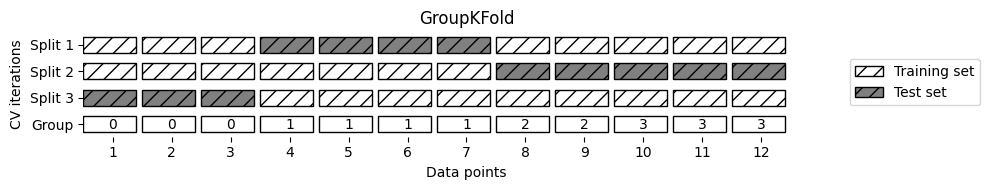

In [20]:
mglearn.plots.plot_group_kfold()

У бібліотеці `scikit-learn` є й інші стратегії розбиття даних для перехресної перевірки, які передбачають ще більшу різноманітність варіантів використання (ви можете знайти їх у посібнику користувача з `scikit-learn`). Однак стандартні стратегії `KFold`, `StratifiedKFold` та `GroupKFold` на сьогоднішній день використовуються найчастіше.

### Ґратчастий пошук (Grid Search)

Тепер, коли ми знаємо, як оцінювати узагальнюючу здатність, ми можемо зробити наступний крок і покращити узагальнюючу здатність моделі, налаштувавши її параметри.

Пошук оптимальних значень ключових параметрів моделі (тобто значень, що дають найкращу узагальнюючу здатність) є складним завданням, але обов'язкова майже для всіх моделей і наборів даних. Оскільки пошук оптимальних значень параметрів є поширеним завданням, бібліотека `scikit-learn` пропонує стандартні методи, що дозволяють її вирішити. Найчастіше використовуваний метод - це **гратчастий пошук** (**grid search**), який по суті є спробою перебрати всі можливі комбінації параметрів, що нас цікавлять.

Розглянемо застосування ядерного методу SVM із ядром RBF (радіальної базисної функцією), реалізованого у класі `SVC`. Як ми вже говорили, в ядерному методі опорних векторів є два важливі параметри: ширина ядра `gamma` і параметр регуляризації `C`. Допустимо, ми хочемо спробувати значення `0.001`, `0.01`, `0.1`, `1`, `10` і `100` для параметра `С` і те саме для параметра `gamma`.

Оскільки нам потрібно спробувати шість різних налаштувань для `C` та `gamma`, виходить 36 комбінацій параметрів загалом. Усі можливі комбінації формують таблицю (яку ще називають ґратами чи сіткою) налаштувань параметрів для SVM.

#### Простий гратчастий пошук (Simple grid Search)

Ми можемо реалізувати простий ґратчастий пошук за допомогою вкладених циклів `for` за двома параметрами, навчаючи та оцінюючи класифікатор для кожної комбінації.

In [21]:
# Наївна реалізація простого гратчастого пошуку
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0)
print("Size of training set: {}   size of test set: {}".format(
      X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # для кожної комбінації параметрів навчаємо SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # оцінюємо SVC на тестовому наборі
        score = svm.score(X_test, y_test)
        # якщо ми отримали кращу оцінку, зберегти оцінку та параметри
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Size of training set: 112   size of test set: 38
Best score: 0.97
Best parameters: {'C': 100, 'gamma': 0.001}


#### Небезпека перенавчання параметрів і перевірочний набір даних

Отримавши такий результат, ми могли б піддатися спокусі і заявити, що знайшли модель, яка дає 97% правильність на нашому наборі даних. Однак ця заява може бути надмірно оптимістичною (або просто невірною) з наступної причини: ми перебрали безліч значень параметрів і вибрали ту комбінацію значень, яка дає найкращу правильність на тестовому наборі, але це зовсім не означає, що на нових даних ми отримаємо таке значення правильності.

**Оскільки ми використовували тестовий набір для налаштування параметрів, ми не можемо використовувати його для оцінки якості моделі.** 

Це та сама причина, з якої нам спочатку потрібно розбивати дані на навчальний і тестовий набори. Тепер для оцінки якості моделі нам потрібний незалежний набір даних, тобто набір, який не використовувався для побудови моделі та налаштування її параметрів.
Один із способів вирішення цієї проблеми полягає в тому, щоб розбити дані ще раз, таким чином, ми отримуємо три набори: 

- навчальний набір для побудови моделі, 
- перевірочний (валідаційний) набір для вибору параметрів моделі, 
- тестовий набір для оцінки якості роботи вибраних параметрів.

Рисунок нижче ілюструє це розбиття

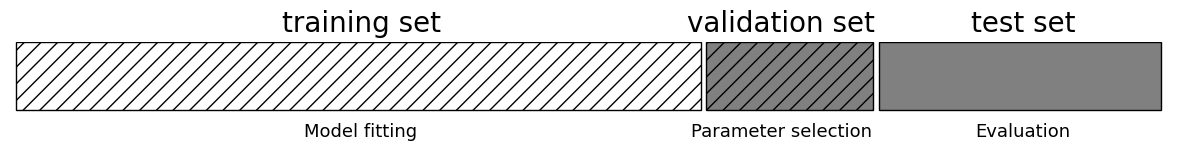

In [22]:
mglearn.plots.plot_threefold_split()

Після вибору найкращих параметрів за допомогою перевірочного набору перевірки, ми можемо знову побудувати модель, використовуючи знайдені налаштування, але тепер на основі об'єднаних навчальних та перевірочних даних. Таким чином ми можемо використовувати для побудови моделі максимально можливу кількість даних. Це призводить до наступного програмного коду

In [23]:
from sklearn.svm import SVC
# розбиваємо дані на навчальную+валідаційну вибірку та тестову вибірку
X_trainval, X_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, random_state=0)
# розбиваємо навчальную+валідаційну вибірку на навчальну та валідаційнц
X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval, y_trainval, random_state=1)
print("Size of training set: {}   size of validation set: {}   size of test set:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # для кожної комбінації параметрів навчаємо SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # оцінюємо SVC на тестовому наборі
        score = svm.score(X_valid, y_valid)
        # якщо ми отримали кращу оцінку, зберегти оцінку та параметриs
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

# перебудуємо модель на комбінації навчальної та валідаційної вибірки
# та проведемо її оцінку на тестовому наборі
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Size of training set: 84   size of validation set: 28   size of test set: 38

Best score on validation set: 0.96
Best parameters:  {'C': 10, 'gamma': 0.001}
Test set score with best parameters: 0.92


Найкраще значення правильності на перевірочному наборі становить 96%, що трохи нижче за значення правильності, отриманого для тестового набору раніше, ймовірно, через те, що ми використовували менше даних для навчання моделі (розмір `X_train` тепер став менше, оскільки ми розбили наш набір даних двічі). Однак значення правильності на тестовому наборі, значення, яке показує реальну узагальнюючу здатність, – стало ще нижчим, 92%. Таким чином ми можемо стверджувати, що правильність класифікації нових даних становить 92%, а не 97%, як ми думали раніше!

Наявність різниці між навчальним, перевірочним і тестовим наборами має принципово важливе значення для застосування методів машинного навчання на практиці. Будь-який вибір, зроблений виходячи з правильності на тестовому наборі, «зливає» моделі інформацію тестового набору. Тому важливо мати окремий тестовий набір, який використовується лише для підсумкової оцінки. 

Здійснення всього розвідувального аналізу та відбору моделі за допомогою комбінації навчального та перевірочного наборів та резервування тестового набору для підсумкової оцінки є гарною практикою. Ця практика є правильною навіть під час проведення розвідувальної візуалізації. Строго кажучи, оцінка якості моделей та вибір найкращої з них за допомогою тестового набору, що використовується для відбору параметрів, призведе до надмірно оптимістичної оцінки правильності моделі.

#### Гратчастий пошук з крос-валідацією

Хоча щойно розглянутий нами метод розбиття даних на навчальний, перевірочний і тестовий набори є цілком робочим і широко використовуваним, він дуже чутливий до правильності розбиття даних.

Поглянувши на висновок, наведений для попереднього фрагмента програмного коду, бачимо, що `GridSearchCV` вибрав як найкращі параметри `'C': 10`, `'gamma': 0.001`, тоді як висновок, наведений для програмного коду в попередньому розділі, повідомляє нам, що найкращими параметрами є `'C': 100`, `'gamma': 0.001`.

Для кращої оцінки узагальнюючої здатності замість одного розбиття даних на навчальний та перевірочний набори ми можемо скористатися перехресною перевіркою. Тепер якість моделі оцінюється для кожної комбінації параметрів з усіх розбиттів перехресної перевірки. Цей метод можна реалізувати за допомогою наступного програмного коду.

In [24]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # для кожної комбінації параметрів,
        # навчаємо SVC
        svm = SVC(gamma=gamma, C=C)
        # виконуємо крос-валідацію
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # обчислюємо середню точність крос-валідації
        score = np.mean(scores)
        # якщо ми отримали кращий показник, зберігаємо показник та параметри
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

# перебудовуємо модель на комбінації навчальної та валідаційної вибірки
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=10, gamma=0.1)

Щоб за допомогою п'ятиблочної перехресної перевірки оцінити правильність SVM для конкретної комбінації значень `C` та `gamma`, нам необхідно навчити 36*5=180 моделей. Як ви розумієте, основним недоліком використання перехресної перевірки є час, який потрібний для навчання всіх цих моделей.

Для кожної комбінації значень `C` і `gamma` (тут показана лише частина комбінацій) обчислюються п'ять значень правильності, по одному для кожного розбиття в перехресній перевірці. Потім для кожної комбінації параметрів обчислюється середнє значення правильності перехресної перевірки. У результаті вибирається комбінація з найбільшою середньою правильністю перехресної перевірки та відзначається червоним кругом.

> Як ми говорили раніше, перехресна перевірка – це спосіб оцінити якість роботи конкретного алгоритму на певному наборі даних. Однак вона часто використовується в поєднанні з методами пошуку параметрів типу ґратчастого пошуку. З цієї причини багато людей у розмовній мові під терміном **перехресна перевірка** (**cross-validation**) мають на увазі **ґратчастий пошук із перехресною перевіркою**.

Загальний процес розбиття даних, запуску ґратчастого пошуку, а також оцінки підсумкових параметрів показано на рисунку нижче.

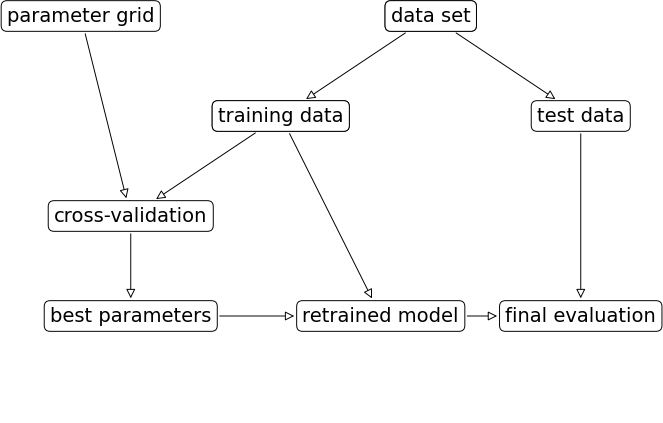

In [25]:
mglearn.plots.plot_grid_search_overview()

Оскільки ґратчастий пошук із перехресною перевіркою є дуже поширеним методом налаштування параметрів, бібліотека `scikit-learn` пропонує клас `GridSearchCV`, у якому ґратчастий пошук реалізований у вигляді моделі. Щоб скористатися класом `GridSearchCV`, спочатку необхідно вказати потрібні параметри за допомогою словника.

`GridSearchCV` побудує всі необхідні моделі. Ключами словника є імена параметрів, що настроюються (в даному випадку `С` і `gamma`), а значеннями - тестовані настройки параметрів. Перебір значень `0.001`, `0.01`, `0.1`, `1`, `10` та `100` для `C` та `gamma` вимагає словника такого вигляду.

In [26]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


Тепер ми можемо створити екземпляр класу `GridSearchCV`, передавши модель (`SVC`), сітку параметрів, що шукаються (`param_grid`), а також стратегію перехресної перевірки, яку ми хочемо використовувати (припустимо, п'ятиблочну стратифіковану перехресну перевірку)

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5,
                          return_train_score=True)

Замість розбиття на навчальний та перевірочний набір, використаного нами раніше, `GridSearchCV` запустить перехресну перевірку. Однак нам, як і раніше, потрібно розділити дані на навчальний та тестовий набори, щоб уникнути перенавчання параметрів

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0)

Створений нами об'єкт `grid_search` аналогічний класифікатору, ми можемо викликати стандартні методи `fit`, `predict` і `score` від його імені.

In [29]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

Процес підгонки об'єкта `GridSearchCV` включає не тільки пошук кращих параметрів, але і автоматичну побудову нової моделі на всьому навчальному наборі даних.

Для її побудови використовуються параметри, що дають найкраще значення правильності перехресної перевірки. Тому процес, який запускається викликом методу 'fit'. Клас `GridSearchCV` пропонує дуже зручний інтерфейс для роботи з моделлю, використовуючи методи `predict` та `score`. Щоб оцінити узагальнюючу здатність знайдених найкращих параметрів, ми можемо викликати метод `score`.

In [30]:
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Test set score: 0.97


Вибравши параметри за допомогою перехресної перевірки, ми фактично виявили модель, яка досягає правильності 97% на тестовому наборі. Головний момент тут у тому, що ми не використовували тестовий набір для вибору параметрів. Знайдена комбінація параметрів зберігається в атрибуті `best_params_`, а найкраще значення правильності перехресної перевірки (значення правильності, усереднене всім розбиттям для даної комбінації параметрів) – в атрибуті `best_score_`.

In [31]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'gamma': 0.1}
Best cross-validation score: 0.97


Знову ж таки, будьте обережні, щоб не переплутати `best_score_` зі значенням узагальнюючої здатності моделі, що обчислюється на тестовому наборі за допомогою методу `score`. Метод `score` (який оцінює якість результатів, отриманих за допомогою методу `predict`) використовує модель, побудовану на всьому навчальному наборі даних. В атрибуті `best_score_` записується середня правильність перехресної перевірки. Для її обчислення використовується модель, побудована на навчальному наборі перехресної перевірки.

У ряді випадків вам необхідно буде ознайомитися з отриманою моделлю, наприклад, поглянути на коефіцієнти чи важливість ознак. Подивитися найкращу модель, побудовану на всьому навчальному наборі, можна за допомогою атрибуту `best_estimator_`.

In [32]:
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Best estimator:
SVC(C=10, gamma=0.1)


Оскільки `grid_search` вже сам по собі включає методи `predict` та `score`, використання `best_estimator_` для отримання прогнозів та оцінки якості моделі не потрібно.

##### Аналіз результатів перехресної перевірки

Часто корисно візуалізувати результати перехресної перевірки, щоб зрозуміти, як узагальнююча здатність залежить від шуканих параметрів. Оскільки виконання ґратчастого пошуку досить затратно з обчислювальної точки зору, доцільно розпочинати пошук із простої та невеликої сітки параметрів. Потім ми можемо перевірити результати ґратчастого пошуку, використовуючи перехресну перевірку, і, можливо, розширити наш пошук.

Результати ґратового пошуку можна знайти в атрибуті `cv_results`, який є словником, який зберігає всі налаштування пошуку. Як ви можете побачити у наведеному нижче висновку, словник містить безліч деталей і набуває більш привабливого вигляду після перетворення в пандасовський `DataFrame`.

In [33]:
import pandas as pd
# convert to Dataframe
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001599,0.003197,0.003198,0.003917,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
1,0.000000,0.000000,0.000000,0.000000,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
2,0.001599,0.003197,0.000000,0.000000,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
3,0.000000,0.000000,0.000000,0.000000,0.001,1,"{'C': 0.001, 'gamma': 1}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
4,0.000000,0.000000,0.001599,0.003198,0.001,10,"{'C': 0.001, 'gamma': 10}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581


Кожен рядок у результатах відповідає одній конкретній комбінації параметрів. Для кожної комбінації записуються результати всіх розбиттів перехресної перевірки, а також середнє значення та стандартне відхилення по всіх розбиттях. Оскільки ми здійснювали пошук на основі двомірної сітки параметрів (`C` та `gamma`), найкращий спосіб візуалізувати цей процес, подати його у вигляді **теплової карти** (**heat map**). Спочатку ми отримаємо середні значення правильності перехресної перевірки, потім змінимо форму масиву зі значеннями так, щоб осі відповідали `C` і `gamma`.

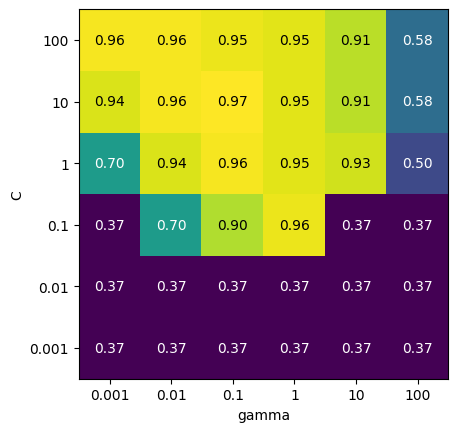

In [34]:
scores = np.array(results.mean_test_score).reshape(6, 6)

# Будуємо теплову карту середніх значень перехресної перевірки
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                      ylabel='C', yticklabels=param_grid['C'], cmap="viridis")

Кожне значення теплової карти відповідає середній правильності перехресної перевірки конкретної комбінації параметрів. Колір передає правильність перехресної перевірки, світлі тони відповідають високій правильності, темні тони – низькій правильності.

Видно, що SVC дуже чутливий до налаштування параметрів. Для більшості параметрів параметрів правильність становить близько 40%, що досить погано; для інших властивостей правильність становить близько 96%. З цього графіка ми можемо винести кілька моментів. 

По-перше, параметри, які ми коригували, дуже важливі для отримання хорошої узагальнюючої здатності. Обидва параметри (`C` і `gamma`) мають велике значення, оскільки їхнє коригування дозволяє підвищити правильність з 40% до 96%. Крім того, інтервали значень, які ми вибрали для параметрів, є діапазонами, в яких ми бачимо суттєві зміни результатів. Крім того, важливо відзначити, що діапазони параметрів досить великі: оптимальні значення для кожного параметра розташовані не по краях, а по графіку.

Тепер давайте подивимося ще на кілька графіків, де результат вийшов менш ідеальним, оскільки діапазони пошуку не були підібрані правильно.

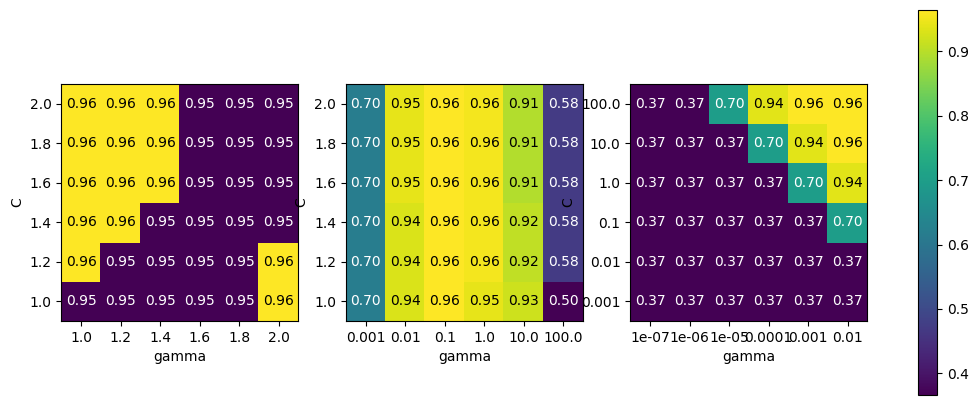

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))

param_grid_linear = {'C': np.linspace(1, 2, 6),
                     'gamma':  np.linspace(1, 2, 6)}

param_grid_one_log = {'C': np.linspace(1, 2, 6),
                      'gamma':  np.logspace(-3, 2, 6)}

param_grid_range = {'C': np.logspace(-3, 2, 6),
                    'gamma':  np.logspace(-7, -2, 6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log,
                           param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)

    # plot the mean cross-validation scores
    scores_image = mglearn.tools.heatmap(
        scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'],
        yticklabels=param_grid['C'], cmap="viridis", ax=ax)

plt.colorbar(scores_image, ax=axes.tolist())

Перший графік показує, що незалежно від вибраних параметрів ніякої зміни правильності не відбувається, всі значення правильності виділені тим самим кольором. В даному випадку це викликано неправильним масштабуванням та діапазоном значень параметрів `C` та `gamma`. Однак, якщо різні параметри не призводять до видимої зміни правильності, це може вказувати на те, що цей параметр просто не важливий. Як правило, спочатку краще встановити крайні значення, щоб подивитися, чи змінюється правильність в результаті коригування параметра.

Другий графік показує значення правильності, що згруповані у вигляді вертикальних смуг. Цей факт свідчить про те, що лише зміна параметра `gamma` впливає правильність. Це може означати, що для параметра `gamma` задані більш цікаві значення, ніж для параметра `С` або це означає, що параметр `C` не важливий.

Третя панель показує зміни правильності обох параметрів. Однак ми бачимо, що в нижній лівій частині графіка нічого цікавого не відбувається. Ймовірно, у майбутньому ми можемо виключити із пошуку дуже малі значення. Оптимальна комбінація параметрів знаходиться у верхньому правому кутку. 

Оскільки оптимальне значення знаходиться на межі графіка, можна очікувати, що, ймовірно, за межами цього кордону існують найкращі значення, і ми могли б змінити наш діапазон пошуку, щоб включити більшу кількість значень у цій галузі.

Налаштування сітки параметрів за допомогою перехресної перевірки – це добрий спосіб дослідити важливість різних параметрів. Однак, як ми вже обговорювали раніше, значення різних параметрів не повинні перевірятись на підсумковому тестовому наборі, якість моделі на тестовому наборі має оцінюватися лише один раз, коли ми точно знаємо, яку модель ми хочемо використовувати.

##### Розпаралелювання перехресної перевірки та гратчастого пошуку

Незважаючи на те, що виконання ґратчастого пошуку з великою кількістю параметрів на величезних наборах даних може представляти складність з обчислювальної точки зору, це завдання є **надзвичайно паралельним** (**embarrassingly parallel**). Це означає, що побудова моделі з використанням конкретного параметра для конкретного розбиття перехресної перевірки може здійснюватися незалежно від інших параметрів і моделей. Даний факт робить ґратчастий пошук та перехресну перевірку ідеальними кандидатами для розпаралелювання по кількох процесорних ядрах або розпаралелювання на кластері. У `GridSearchCV` і `cross_val_score` ви можете використовувати кілька процесорних ядер, задавши значення параметра `n_jobs`, що дорівнює потрібній кількості ядер. Ви можете встановити `n_jobs=-1`, щоб використати всі доступні ядра.

Майте на увазі, що `scikit-learn` не підтримує вкладеність паралельних операцій (nesting of parallel operations). Тому, якщо ви використовуєте опцію `n_jobs` для вашої моделі (наприклад, для випадкового лісу), ви не можете використовувати її в `GridSearchCV` для пошуку по цій моделі. При роботі з великими наборами даних і складними моделями використання великої кількості ядер, можливо, вимагатиме занадто багато пам'яті і ви повинні контролювати її використання пам'яті при паралельному побудуванні великих моделей.

### Метрики якості моделі та їх обчислення


До цього часу ми оцінювали якість класифікації, використовуючи правильність (частку правильно класифікованих прикладів), і якість регресії, використовуючи $R^2$. Однак це лише два показники з великої кількості можливих метрик, які використовуються для оцінки якості контрольованої моделі на даному наборі даних. На практиці ці метрики якості можуть не відповідати вашим завданням, і тому дуже важливо при відборі моделей та коригуванні параметрів підібрати правильну метрику.

#### Пам'ятайте про кінцеву мету

Вибираючи метрику, ви повинні пам'ятати про кінцевої мети проекту машинного навчання. Насправді ми, зазвичай, зацікавлені у не в створенні точних прогнозів, а й у тому, щоб використовувати їх у рамках масштабнішого процесу прийняття рішень. Перш ніж вибрати показник якості машинного навчання, варто подумати про високорівневу мету вашого проекту, яку часто називають **бізнес-метрикою** (**business metric**). Наслідки, зумовлені вибором конкретного алгоритму того чи іншого проекту, називаються **впливом на бізнес** (**business impact**).

Можливо, високорівневою метою є запобігання дорожньо-транспортним пригодам або зменшення кількості випадків госпіталізації. Такою метою також може бути збільшення відвідуваності вашого сайту або суми покупок у вашому магазині. Ви повинні вибрати таку модель або значення параметрів, які мають найбільший позитивний вплив на бізнес-метрику. Часто це завдання є важким, оскільки оцінка впливу конкретної моделі на бізнес може вимагати її впровадження у реальне виробництво.

Як правило, на ранніх етапах розробки, а також при налаштуванні параметрів впровадити модель у виробництво тільки для тестування неможливо через виникнення високих комерційних і людських ризиків. Уявіть собі, що ви, оцінюючи систему запобігання зіткненню з пішоходами, якою обладнано автомобіль, що самопілотується, просто дозвольте автомобілю їхати, не перевіривши його. Якщо ваша модель має низьку якість, на пішоходів чекають неприємності! Тому нам зазвичай потрібно знайти якусь заміщувальну процедуру оцінки, яка використовує метрики якості, що легко обчислюються. Наприклад, ми могли б спробувати класифікувати зображення пішоходів та не-пішоходів та виміряти правильність. Пам'ятайте про те, що дана процедура є замінною і вона виправдовує себе, дозволяючи знайти метрику, максимально близьку до вихідної бізнес-мети і оцінку, що піддається. Дана метрика повинна використовуватись по можливості для оцінки та відбору моделі. Можливо, що в результаті цієї процедури ви не отримаєте якоїсь конкретної цифри, наприклад, висновок, знайдений за допомогою алгоритму, може звучати так: у вас на 10% більше клієнтів, але кожен клієнт витрачатиме на 15% менше – проте ця процедура повинна оцінити вплив на бізнес, що залежить від вибору тієї чи іншої моделі.

У цьому розділі ми спочатку розглянемо метрики для бінарної класифікації, потім звернемося до мультикласової класифікації і на завершення обговоримо регресію.

#### Метрики для бінарної класифікації

Бінарна класифікація є, мабуть, найбільш поширеним та концептуально простим прикладом практичного застосування машинного навчання. Однак навіть при вирішенні цього простого завдання існує ціла низка нюансів. Перш ніж ми заглибимося в альтернативні метрики, давайте розглянемо ситуації, в яких правильність виміру може ввести в оману. Згадаймо, що в разі бінарної класифікації ми говоримо про **позитивний** (**positive**) клас і **негативний** (**negative**) клас, маючи на увазі під позитивним класом клас, що цікавить нас.

##### Типи помилок

Як правило, правильність не є адекватним показником прогностичної здібності, оскільки кількість помилок, що робляться, не містить весь обсяг цікавої для нас інформації. Уявіть скринінгове обстеження для раннього виявлення раку, побудоване на основі автоматизованого тесту. Якщо тест негативний, пацент буде вважатися здоровим, тоді як якщо тест позитивний, пацієнт буде підданий додатковому обстеженню. Тут називаємо позитивним тестом (наявність раку) позитивний клас, а негативний тест відповідає негативному класу. Ми не можемо бути впевнені у чудовій роботі моделі, вона неминуче буде зважувати помилки. Виконуючи той чи інший проект, ми маємо запитати себе, якими можуть бути наслідки цих помилок у реальному світі.

Одна з можливих помилок полягає в тому, що здоровий пацієнт класифікується як хворий (позитивний клас), що дасть привід для додаткового тестування. Додаткове обстеження призведе до деяких витрат та незручностей для пацієнта (і, можливо, певного психічного дискомфорту). Приклад, неправильно спрогнозований як позитивний, називається **хибно позитивним** (**false positive**).

Інша можлива помилка полягає в тому, що хворий пацієнт буде класифікований як здоровий (негативний клас), не пройде додаткових тестів і не отримає лікування. Недіагностований вчасно рак може призвести до серйозних проблем зі здоров'ям і може закінчитися смертельним наслідком. Приклад, неправильно спрогнозований як негативний, називається **хибно негативним** (**false negative**).

У статистиці помилково позитивний приклад також відомий як **помилка I роду** (**type I error**), а помилково негативний приклад - як **помилка II роду** (**type II error**). Ми дотримуватимемося визначень «хибно негативний приклад» та «хибно позитивний приклад», оскільки вони є явнішими і їх легше запам'ятати. У прикладі з діагностикою раку очевидно, що ми хочемо мінімізувати частку помилково негативних прикладів, тоді як помилково позитивні приклади можна вважати значно меншою неприємністю.

Хоча вищенаведений приклад є досить яскравим, кожен хибно позитивний і хибно негативний прогноз рідко призводить до одних і тих самих наслідків. У комерційних проектах обом видам помилок можна привласнити певні вартості, які дозволяють виміряти похибку конкретного прогнозу в грошах, а чи не з погляду правильності. Для процесу ухвалення бізнес-рішень, що використовує модель, цей крок має набагато більше значення.

##### Несбалансовані набори даних

Типи помилок відіграють важливу роль, коли один із двох класів зустрічається набагато частіше, ніж інший. Це дуже поширена ситуація на практиці. Гарним прикладом є прогноз рейтингу кліків, де кожна точка даних є «показом» – елементом, пред'явленим користувачеві. Цим елементом може бути оголошення, розповідь, користувач соціальної мережі. Мета полягає в тому, щоб передбачити, чи користувач при показі даного елемента кликати по ньому (що вказує на його інтерес). 

Більшість того, що бачить користувач в Інтернеті (зокрема, рекламні оголошення), не викликає у нього особливого інтересу. Вам потрібно буде показати користувачу 100 оголошень або статей, перш ніж він знайде щось досить цікаве для себе, щоб натиснути. Це дозволяє отримати набір даних, в якому 99 точок даних відповідають ситуації "не клікнув" і 1 точка даних - "клікнув". Інакше кажучи, 99% прикладів ставляться до класу «відсутність кліка». Набори даних, у яких один клас зустрічається набагато частіше, ніж інші, часто називають **незбалансованими наборами даних** (**imbalanced datasets**) або **наборами даних з незбалансованими класами** (**datasets with imbalanced classes**). Насправді незбалансовані дані є нормою і рідко буває, що цікавий клас зустрічався в даних з однаковою або майже такою ж частотою, що й інші класи.

Тепер припустимо, що ви будуєте класифікатор, який під час вирішення завдання прогнозування кліків має правильність 99%. Про що це каже? Правильність 99% звучить вражаюче, але вона не бере до уваги дисбаланс класів. Ви можете досягти 99% правильності і без побудови моделі машинного навчання, завжди прогнозуючи «відсутність кліка» З іншого боку, навіть для незбалансованих даних модель з 99% правильною могла б бути цілком придатною. Однак у даному випадку правильність не дозволяє нам відрізнити модель «постійно прогнозуємо відсутність кліка» від потенційно гарної моделі.

Щоб проілюструвати це, ми на основі набору даних digits створимо незбалансований набір даних з пропорціями 9:1, створивши два класи «не-дев'ятка» та «дев'ятка»:

In [36]:
from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, y, random_state=0)

Ми можемо скористатися `DummyClassifier`, який завжди передбачає мажоритарний клас (у даному випадку клас «не-дев'ятка»), щоб проілюструвати, наскільки малоінформативною може бути правильність.

In [37]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("Unique predicted labels: {}".format(np.unique(pred_most_frequent)))
print("Test score: {:.2f}".format(dummy_majority.score(X_test, y_test)))

Unique predicted labels: [False]
Test score: 0.90


Ми отримали 90% правильність без будь-якого навчання Це може здатися вражаючим, але подумайте про це на хвилину. Уявіть собі, хтось говорить вам, що його модель має 90% правильність. Можна зробити висновок, що він зробив дуже хорошу роботу. Але це цілком можливо лише правильно прогнозуючи один клас! Давайте порівняємо цей результат із результатом, отриманим за допомогою реальної моделі.

In [38]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("Test score: {:.2f}".format(tree.score(X_test, y_test)))

Test score: 0.92


З точки зору правильності `DecisionTreeClassifier` виявився трохи кращим, ніж `DummyClassifier`, що постійно пророкує мажоритарний клас. Це може означати, що ми неправильно використовували `DecisionTreeClassifier`, або правильність насправді не є в даному випадку адекватною метрикою.

Для порівняння давайте оцінимо якість ще двох класифікаторів, `LogisticRegression` та звичайний `DummyClassifier`, який видає випадкові прогнози.

In [39]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy score: {:.2f}".format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(max_iter=1000, C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg score: {:.2f}".format(logreg.score(X_test, y_test)))

dummy score: 0.90
logreg score: 0.98


Даммі-класифікатор, який генерує випадкові прогнози, має набагато гіршу якість (з точки зору правильності), тоді як логістична регресія дає дуже добрі результати. Однак навіть випадковий класифікатор дає 80% правильність.

Тому дуже важко судити, який із цих результатів є справді корисним. Проблема тут у тому, що з незбалансованих наборів даних правильність перестала бути адекватною метрикою, що дозволяє кількісно оцінити прогностичну здатність моделі. Нам потрібні такі метрики, які дозволяють порівняти правильність моделі машинного навчання з правильністю класифікатора, що завжди передбачає клас, що найчастіше зустрічається, або випадкового класифікатора (в даному випадку такі класифікатори були обчислені за допомогою `pred_most_frequent` і `pred_dummy`). Якщо ми використовуємо якусь метрику для оцінки моделі, вона має вміти відсікати ці безглузді прогнози.

##### Матриця помилок (Confusion matrix)

Одним із найбільш розгорнутих способів, що дозволяють оцінити якість бінарної класифікації, є використання матриці помилок. Досліджуємо прогнози моделі `LogisticRegression`, побудованої в вище, за допомогою функції `confusion_matrix`. Прогнози для тестового набору даних ми зберегли в `pred_logreg`.

In [40]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[402   1]
 [  6  41]]


Висновок `confusion_matrix` є масивом розміром 2x2, де рядки відповідають фактичним класам, а стовпці відповідають спрогнозованим класам. У цьому випадку йдеться про класи «не-дев'ятка» та «дев'ятка». Число у кожному осередку показує кількість прикладів, коли спрогнозований клас, представлений стовпцем, збігається чи збігається з фактичним класом, представленим рядком.

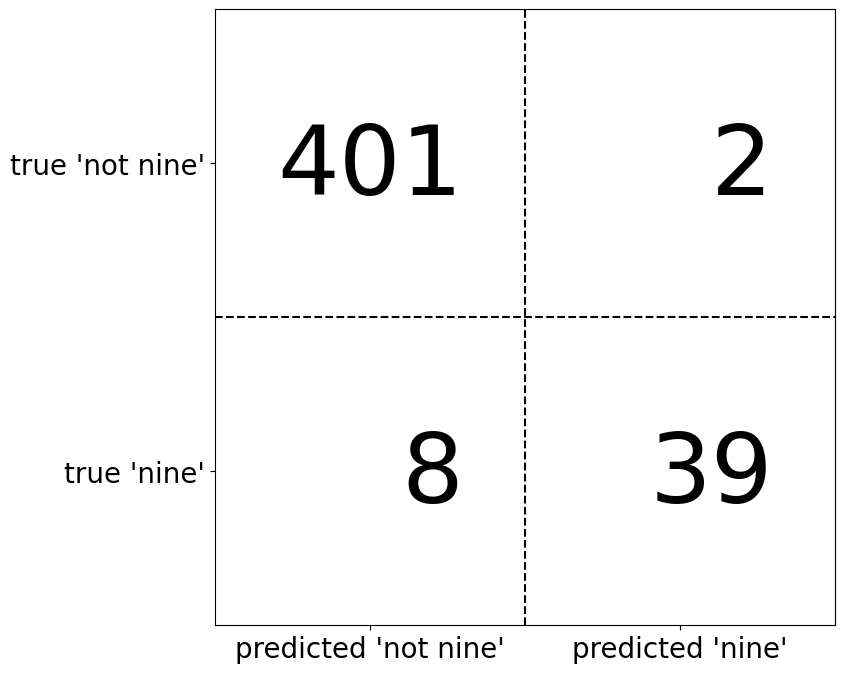

In [41]:
mglearn.plots.plot_confusion_matrix_illustration()

Елементи головної діагоналі матриці помилок відповідають правильним прогнозам (результатам класифікації), тоді як інші елементи показують, скільки прикладів, що відносяться до одного класу, були класифіковані помилково як інший клас.

Оголосивши «дев'ятку» позитивним класом, ми можемо розглянути елементи матриці помилок у термінах помилково позитивних (false positive) та помилково негативних (false negative) прикладів, які ми запровадили раніше.

Для повноти картини назвемо правильно класифіковані позитивні приклади **істинно позитивними** (**true positive**), а правильно класифіковані негативні приклади – **істинно негативними** (**true negative**). Ці терміни, як правило, записують у скороченому вигляді як **FP**, **FN**, **TP** та **TN** і призводять до наступної інтерпретації матриці помилок.

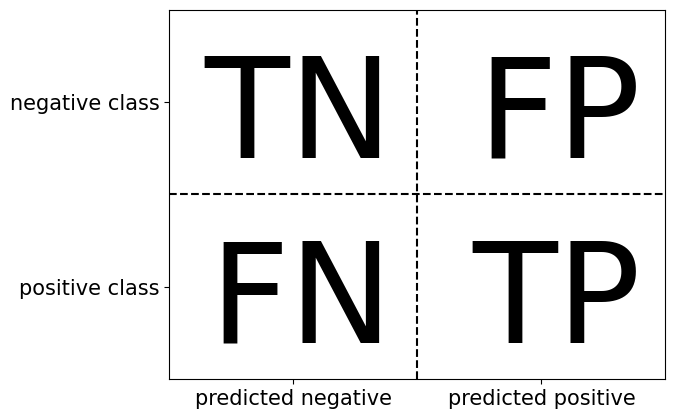

In [42]:
mglearn.plots.plot_binary_confusion_matrix()

Тепер давайте скористаємося матрицею помилок для порівняння раніше збудованих моделей (дві даммі-моделі, дерево рішень, а також логістична регресія).

In [43]:
print("Most frequent class:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\nDummy model:")
print(confusion_matrix(y_test, pred_dummy))
print("\nDecision tree:")
print(confusion_matrix(y_test, pred_tree))
print("\nLogistic Regression")
print(confusion_matrix(y_test, pred_logreg))

Most frequent class:
[[403   0]
 [ 47   0]]

Dummy model:
[[403   0]
 [ 47   0]]

Decision tree:
[[390  13]
 [ 24  23]]

Logistic Regression
[[402   1]
 [  6  41]]


Поглянувши на матрицю помилок, стає зрозуміло, що з моделлю `pred_most_frequent` щось не так, тому що вона завжди передбачає той самий клас. З іншого боку, модель pred_dummy характеризується дуже невеликою кількістю істинно позитивних прикладів (4) порівняно з іншими прикладами, причому кількість помилково позитивних прикладів істотно більша кількості істинно позитивних прикладів! 

Прогнози, отримані з допомогою дерева рішень, несуть набагато більше сенсу, ніж прогнози даммі-модели, хоча правильність цих моделей майже однакова. І, нарешті, ми бачимо, що прогнози логістичної регресії кращі прогнозів `pred_tree` у всіх аспектах: вона має більшу кількість істинно позитивних та істинно негативних прикладів, у той час кількість помилково позитивних та помилково негативних прикладів поменшало. 

З цього порівняння ясно, що лише дерево рішень і логістична регресія дають розумні результати, причому логістична регресія працює краще за дерево у всіх відносинах. Однак інтерпретація матриці помилок трохи громіздка і хоча ми отримали масу інформації, аналізуючи всі аспекти матриці, процес роботи з матрицею помилок був трудомістким та складним. є кілька способів узагальнити інформацію, що міститься в матриці помилок Про них ми поговоримо у наступному розділі.

###### Зв'язок з правильністю


Ми вже знайомі з одним із способів узагальнити результати матриці - обчисленням правильності, яку можна виразити у вигляді наступної формули:

$Accuracy = \frac{TP + TN}{TP+TN+FP+FN}$

Іншими словами, правильність - це кількість правильно класифікованих прикладів (**TP** і **TN**), поділених на загальну кількість прикладів (сумуємо всі елементи матриці помилок).

##### Влучність, повнота та F-міра (Precision, Recall and F-Score)

Є ще кілька способів підсумувати інформацію матриці помилок, що найчастіше використовуються з них є **влучність** і **повнота**.

**Влучність** (**precision**) показує, скільки із передбачених позитивних прикладів виявилися справді позитивними. Таким чином, влучність – це частка істинно позитивних прикладів від загальної кількості передбачуваних позитивних прикладів.

$Precision = \frac{TP}{TP+FP}$

Влучність використовується як показник якості моделі, коли мета полягає в тому, щоб знизити кількість помилково позитивних прикладів. 

Як приклад уявіть модель, яка дожна спрогнозувати, чи ефективний новий лікарський препарат під час лікування хвороби. Клінічні випробування, як відомо, дорогі, та фармацевтична компанія хоче провести їх лише у тому випадку, коли повністю переконається, що препарат справді працює. Тому важливо мінімізувати кількість помилково позитивних прикладів, іншими словами, необхідно збільшити влучність. Влучність також відома як **прогностична цінність позитивного результату** (**positive predictive value**, **PPV**).

З іншого боку, **повнота** (**recall**) показує, скільки від загального числа фактичних позитивних прикладів було передбачено як
позитивний клас. Повнота - це частка істинно позитивних прикладів загальної кількості фактичних позитивних прикладів.

$Recall = \frac{TP}{TP+FN}$

Повнота використовується як показник якості моделі, коли нам необхідно визначити всі позитивні приклади, тобто коли важливо знизити кількість помилково негативних прикладів. Приклад діагностики раку, наведений раніше, є гарною ілюстрацією подібного завдання: важливо виявити всіх хворих пацієнтів, при цьому, можливо, включивши до них здорових пацієнтів. Інші назви повноти – **чутливість** (**sensitivity**), **відсоток результативний відповідей** або **хіт-рейт** (**hit rate**) та **частка істинно позитивних прикладів** (**true positive rate**, **TPR**).

Завжди необхідно знайти компроміс між оптимізацією повноти та оптимізацією влучноісті. Ви легко можете отримати ідеальну повноту, спрогнозувавши всі приклади як позитивні – не буде ніяких хибно негативних та істинно негативних прикладів. Проте прогнозування всіх прикладів як позитивних призведе до великій кількості помилково позитивних прикладів, і, отже, влучність буде дуже низькою.

З іншого боку, припустимо, у вас є набір даних з 201 прикладу і ви будуєте модель, яка прогнозує один приклад як позитивний (і цей приклад дійсно відноситься до позитивного класу), а всі інші приклади відносить до негативного класу. Припустимо, матриця
помилок виглядає так.

TN 100 FP 0

FN 100 TP 1

Обчислимо влучність та повноту. Влучність буде ідеальною, а повнота дуже низькою.

$Precision = \frac{TP}{TP+FP} = \frac{1}{1+0} = 1$

$Recall = \frac{TP}{TP+FN} = \frac{1}{1+100} = 0.0099$

> Влучність і повнота – це лише дві метрики з множини показників класифікації, які отримуються за допомогою TP, FP, TN та FN. Ви можете знайти докладний опис метриків у Вікіпедії. Серед фахівців з машинного навчання влучність та повнота є, можливо, найчастіше використовуваними метриками бінарної класифікації, однак інші фахівці можуть використовувати інші пов'язані з ними показники.

Хоча влучність та повнота є дуже важливими метриками, самі вони не дадуть вам повної картини. Одним із способів підсумувати їх є **F-міра** (**F-measure**), яка є гармонійне середнє влучності та повноти:

$F = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}$

Цей варіант обчислення F-міри ще відомий як $F_1$-міра. Оскільки $F_1$-міра враховує влучність і повноту, то для бінарної класифікації незбалансованих даних може бути кращою метрикою, ніж правильність.

Давайте застосуємо її до прогнозів нашого набору даних «дев'ятка проти інших», отриманими нами раніше. У даному випадку ми вважатимемо клас «дев'ятка» позитивним класом (він отримує мітку `True`, тоді як клас «не-дев'ятка» отримує мітку `False`), таким чином, позитивний клас є міноритарним класом.

In [44]:
from sklearn.metrics import f1_score
print("f1 score most frequent: {:.2f}".format(
    f1_score(y_test, pred_most_frequent)))
print("f1 score dummy: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("f1 score tree: {:.2f}".format(f1_score(y_test, pred_tree)))
print("f1 score logistic regression: {:.2f}".format(
    f1_score(y_test, pred_logreg)))

f1 score most frequent: 0.00
f1 score dummy: 0.00
f1 score tree: 0.55
f1 score logistic regression: 0.92


Тут ми можемо відзначити два моменти. По-перше, ми отримуємо повідомлення про помилку для прогнозів моделі `most_frequent`, оскільки не було отримано жодного прогнозу позитивного класу (отже знаменник у формулі розрахунку f-міри дорівнює нулю). Крім того, ми можемо побачити досить сильну різницю між прогнозами даммі-модели і прогнозами дерева, яке так явно впадає у вічі, коли ми аналізуємо лише правильність. 

Використовуючи f-міру для оцінки якості, ми підсумовуємо знову прогностичну здатність за допомогою одного числа. Однак, схоже, що f-міра дійсно дає краще уявлення про якість моделі, ніж правильність. Разом з тим, недолік f-міри полягає в тому, що на відміну від правильності її важче інтерпретувати і пояснити.

Якщо ми хочемо отримати більш розгорнутий звіт про точність, влучність та $F_1$-міру, можна скористатися зручною функцією `classification_report`, щоб обчислити всі три метрики відразу і роздрукувати їх у привабливому вигляді.

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent,
                            target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



c:\python\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Функція `classification_report` друкує звіт, у якому виводяться показники влучності, повноти та f-міри для негативного та позитивного класів. Міноритарний клас "дев'ятка" вважається позитивним класом. Значення f-міри для нього дорівнює `0`. Для мажоритарного класу «не-дев'ятка» значення f-міри дорівнює `0.94`. Крім того, повнота для класу "не-дев'ятка" дорівнює `1`, оскільки ми класифікували всі приклади як "не-дев'ятки". Крайній правий стовпець – це **підтримка** (**support**), яка дорівнює фактичній кількості прикладів цього класу.

В останньому рядку звіту наводяться середні значення метрик, зважені за кількістю фактичних прикладів у кожному класі. Пояснимо процес обчислення виваженого середнього значення на прикладі f-метрики. Спочатку обчислюємо ваги негативного та позитивного класів. Вага негативного класу дорівнює `403/450 = 0.90`. Вага позитивного класу дорівнює `47/450 = 0.10`. Тепер спрогнозоване значення f-міри для кожного класу множимо на вагу відповідного класу, складаємо результати та отримуємо зважене середнє значення f-міри: `0.90 x 0.94 + 0.10 x 0.00 = 0.85`. Нижче наведено ще два звіти – для даммі-класифікатора та логстичної регресії.

In [46]:
print(classification_report(y_test, pred_dummy,
                            target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



c:\python\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
print(classification_report(y_test, pred_logreg,
                            target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.99      1.00      0.99       403
        nine       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



Поглянувши на звіти, можна побачити, що різницю між даммі-моделлю і моделлю логістичної регресії не настільки очевидні. Рішення про те, який клас оголосити позитивним має великий вплив на метрики. Незважаючи на те, що в даммі-класифікаторі f-міра для класу «дев'ятка» дорівнює 0.13 (у порівнянні з 0.89 для логістичної регресії), а для класу «не-дев'ятка» вона дорівнює 0.90 (у порівнянні з 0.99 для логістичної регресії) схоже, що обидві моделі дають розумні результати. Однак, проаналізувавши всі показники разом, можна скласти досить точну картину та чітко побачити перевагу моделі логістичної регресії.

##### Беремо до уваги невизначеність

Матриця помилок та звіт про результати класифікації дозволяють провести дуже детальний аналіз одержаних прогнозів. Однак самі по собі прогнози позбавлені великого обсягу інформації, зібраної моделлю. Більшість класифікаторів для оцінки ступеня достовірності прогнозів дозволяють використовувати методи `decision_function` чи `predict_proba`. Отримати прогнози можна, встановивши для `decision_function` або `predict_proba` граничне значення у певній фіксованій точці – у разі бінарної класифікації ми використовуємо `0` для вирішальної функції та `0.5` для методу `predict_proba`.

Нижче наведено приклад незбалансованої бінарної класифікації: 400 точок даних у негативному класі та 50 точок даних у позитивному класі. Навчальні дані показано на рисунку нижче зліва. Ми навчаємо модель ядерного SVM цих даних, і навіть виводимо праворуч графіки навчальних даних, показують значення вирішальної функції як теплокарти. У самому центрі графіка можна побачити чорне коло, яке відповідає граничному значенню `decision_function`, що дорівнює нулю. Точки всередині цього кола класифікуватимуться як позитивний клас, а точки поза колом будуть віднесені до негативного класу.

In [48]:
X, y = make_blobs(n_samples=(400, 50), cluster_std=[7.0, 2],
                  random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)

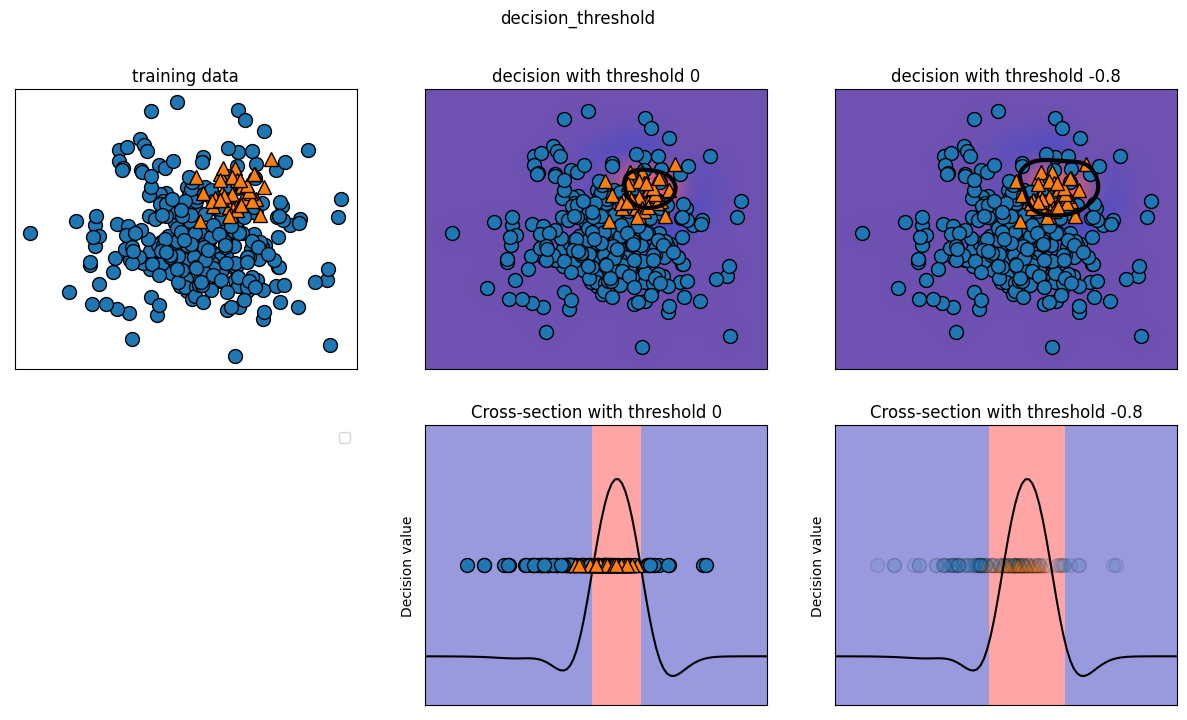

In [49]:
mglearn.plots.plot_decision_threshold()

Скористаємося функцією `classification_report`, щоб оцінити точність та повноту для обох класів

In [50]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



Для класу `1` ми отримуємо досить невелике значення повноти та ще більш низьке значення точності. Оскільки клас `0` представлений набагато більшою кількістю прикладів, класифікатор точніше прогнозує клас `0` і набагато менш точно клас `1`.

Припустимо, що в нашому прикладі набагато важливіше отримати високе значення повноти для класу, як у випадку зі скринінгом раку, наведеному раніше. Це означає, що ми готові допустити більшу кількість хибних спрацьовувань (випадків, коли неправильно спрогнозовано клас `1`), що дасть нам більшу кількість істинно позитивних прикладів (тобто збільшить значення повноти). Прогнози, отримані за допомогою `svc.predict`, не відповідають цій вимозі, але ми можемо скоригувати їх, щоб отримати більш високе значення повноти для класу `1`. Для цього необхідно змінити граничне значення для прийняття рішень. За умовчанням точки даних зі значеннями вирішальної функції більше `0` класифікуватимуться як клас `1`. Ми хочемо збільшити кількість точок даних, прогнозованих як клас `1`, тому потрібно знизити граничне значення.

In [51]:
y_pred_lower_threshold = svc.decision_function(X_test) > -0.8

Погляньмо на звіт про результати класифікації, отриманий для цього прогнозу.

In [52]:
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

    accuracy                           0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



Як і слід очікувати, значення повноти для класу `1` стало високим, а влучність впала. Зараз для більшої області простору ми прогнозуємо клас `1`, як показано у верхній правій частині рисунку вище. Якщо вам потрібно збільшити влучність порівняно з повнотою або навпаки, або ваші дані значною мірою не збалансовані, зміна граничного значення є найпростішим способом покращити результат. Оскільки вирішальна функція може набувати різних діапазонів значень, важко сформулювати правило, що стосується вибору порогового значення.

> Встановлюючи граничне значення, переконайтеся, що не використовуєте для цього тестовий набір. Як і у випадку з будь-яким іншим параметром, граничне значення, вибране за допомогою тестового набору, ймовірно, дасть дуже оптимістичні результати. Щоб вибрати граничне значення, використовуйте перевірочний набір або перехресну перевірку.

Вибрати граничне значення для моделей, що підтримують метод `predict_proba`, простіше, оскільки висновком `predict_proba` є числа, що знаходяться у фіксованому діапазоні від `0` до `1` і є ймовірними. За замовчуванням поріг `0.5` означає, що якщо модель більш ніж на 50% «впевнена», що ця точка є позитивним класом, то точка буде класифікована як позитивний клас. Підвищення порогового значення передбачає, що моделі потрібен великий ступінь впевненості, щоб ухвалити рішення на користь позитивного класу (або менший ступінь впевненості, щоб ухвалити рішення на користь негативного класу). Незважаючи на те, що працювати з ймовірностями простіше, ніж працювати з довільними граничними значеннями, не всі моделі дозволяють отримати реалістичні оцінки невизначеності (наприклад, дерево рішень максимальної глибини завжди на 100% упевнене у своїх прогнозах, хоча це часто не так).

Це пов'язано з поняттям **калібрування** (**calibration**): калібрована модель є модель, яка дозволяє точно виміряти невизначеність оцінок.

##### Криві влучності-повноти та ROC-криві

Як було зазначено вище, зміна порогу, що використовується для класифікації рішень моделі, – це спосіб, що дозволяє знайти компроміс між влучністю та повнотою для даного класифікатора.

Можливо, ви хочете пропустити менше 10% позитивних прикладів, таким чином бажане значення повноти становитиме 90%. Рішення залежить від конкретного прикладу і має визначатися бізнес-цілями. Як тільки поставлено конкретну мету, скажімо, задано конкретне значення повноти чи влучності для класу, можна встановити відповідний поріг. Завжди можна задати те чи інше граничне значення для реалізації конкретної мети (наприклад, досягнення значення повноти 90%). Складність полягає у розробці такої моделі, яка при цьому порозі ще й матиме прийнятне значення влучності, адже класифікувавши всі приклади як позитивні, ви отримаєте значення повноти, що дорівнює 100%, але при цьому ваша модель буде марною.

Вимогу, яка висувається до якості моделі (наприклад, значення повноти має бути 90%), часто називають **робочою точкою** (**operating point**). Фіксування робочої точки часто буває корисним у контексті бізнесу, щоб гарантувати певний рівень якості клієнтам чи іншим групам осіб усередині організації.

Як правило, при розробці нової моделі немає чіткого уявлення про те, що буде робочою точкою. З цієї причини, а також для того, щоб отримати більш повне уявлення про задачу, що вирішується, корисно відразу поглянути на всі можливі порогові значення або всі можливі співвідношення влучності і повноти для цих порогових значень. Цю процедуру можна здійснити за допомогою інструмента, що називається **кривою влучності-повноти** (**precision-recall curve**). Функцію для обчислення кривої влучності-повноти можна знайти у модулі `sklearn.metrics`. Їй необхідно передати фактичні мітки класів та спрогнозовані ймовірності, обчислені за допомогою `decision_function` або `predict_proba`:

In [53]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test))

Функція `precision_recall_curve` повертає список значень влучності та повноти для всіх можливих порогових значень (всіх значень вирішальної функції) у відсортованому вигляді, тому ми можемо побудувати криву, як показано на рисунку нижче

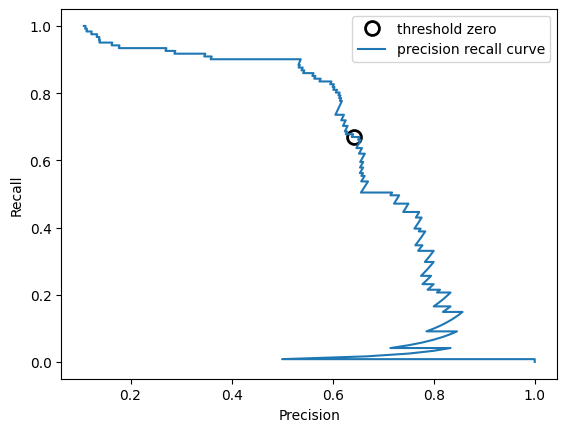

In [54]:
# викорисовуємо більше точок даних для більш гладшої кривої
X, y = make_blobs(n_samples=(4000, 500), cluster_std=[7.0, 2], random_state=22)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)

precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test))

# знаходимо поріг найближче до нуля
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

Кожна точка на кривій відповідає можливому граничному значенню вирішальної функції. Наприклад, видно, що ми можемо досягти повноти `0.4` за влучності близько `0.75`. Чорне коло відзначає точку, що відповідає порогу `0`, пороговому значенню по замовченню для вирішальної функції. Ця точка є компромісом, який вибирається під час виклику методу `predict`.

Чим ближче крива підходить до верхнього правого кута, тим краще класифікатор. Точна у верхньому правому куті означає високе значення влучності та високе значення повноти для відповідного порога. Крива починається у верхньому лівому кутку, що відповідає дуже низькому порогу, всі приклади класифікуються як позитивний клас. Підвищення порога переміщає криву у бік вищих значень влучності й те водночас нижчих значень повноти. При подальшому підвищенні порога ми отримуємо ситуацію, в якій більшість точок, класифікованих як позитивні, є істинно позитивними, що призводить до дуже високої влучності, але нижчого значення повноти. Чим більше модель зберігає високе значення повноти при одночасному збільшенні влучності, тим краще.

Поглянувши на цю криву трохи уважніше, можна побачити, що за допомогою побудованої моделі можна досягти влучності в районі `0.5` при дуже високому значенні повноти. Якщо ми хочемо отримати набагато більш високе значення влучності, ми маємо значною мірою пожертвувати повнотою.

Іншими словами, ліворуч наша крива виглядає відносно плоскою, це означає, що при збільшенні влучності повнота падає незначно. Однак, щоб отримати значення точності більше `0,5`, нам доведеться пожертвувати значним зниженням повноти.

Різні класифікатори можуть давати хорошу якість різних на ділянках кривої, тобто у різних робочих точках. Порівняємо модель SVM з моделлю випадкового лісу, побудованої на тому ж наборі даних. `RandomForestClassifier` замість `decision_function` використовує метод `predict_proba`. Функція `precision_recall_curve` очікує, що у якості другого аргументу їй буде передана ймовірність позитивного класу (класу `1`), тобто `rf.predict_proba(X_test)[:, 1]`. У бінарній класифікації граничне значення за промовчанням для `predict_proba` дорівнює `0.5`, тому ми відзначили цю точку на кривій

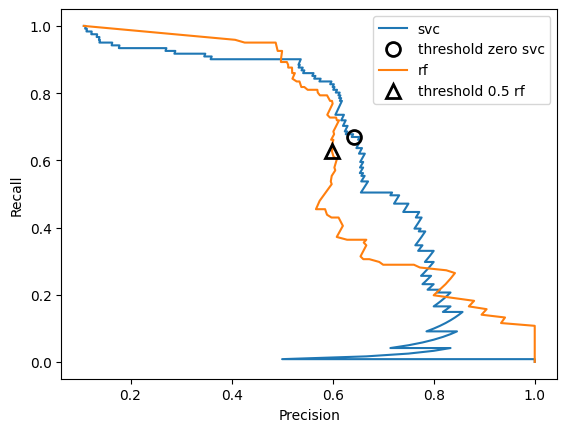

In [55]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

# RandomForestClassifier has predict_proba, but not decision_function
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(
    y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(precision, recall, label="svc")

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero svc", fillstyle="none", c='k', mew=2)

plt.plot(precision_rf, recall_rf, label="rf")

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k',
         markersize=10, label="threshold 0.5 rf", fillstyle="none", mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

З порівняльного графіка видно, що випадковий ліс дає кращу якість, ніж SVM, для крайніх порогових значень, дозволяючи отримати дуже високе значення влучності чи дуже високе значення повноти. Що стосується центральної частини кривої (відповідає приблизної точності = `0.7`), то SVM працює краще. Якби ми для порівняння узагальнюючої здібності в цілому аналізували лише f1-міру, ми прогавили б ці тонкощі. f1-міра враховує тільки одну точку на кривій точності-повноти, точку, що визначається порогом за умовчанням.

In [56]:
print("f1_score of random forest: {:.3f}".format(
    f1_score(y_test, rf.predict(X_test))))
print("f1_score of svc: {:.3f}".format(f1_score(y_test, svc.predict(X_test))))

f1_score of random forest: 0.610
f1_score of svc: 0.656


Порівняння двох кривих влучності-повноти дає багато детальної інформації, але є досить трудомістким процесом. Щоб виконати автоматичне порівняння моделей, ми могли б узагальнити інформацію, що міститься в кривій, не обмежуючись конкретним граничним значенням або робочою точкою. Один із способів підсумувати інформацію кривої полягає в обчисленні інтегралу або площі під кривою влучності-повноти, він також відомий як **метод середньої влучності** (**average precision**).

Для обчислення середньої влучності ви можете скористатися функцією `average_precision_score`. Оскільки нам потрібно обчислити ROC-криву та розглянути кілька порогових значень, функції `average_precision_score` замість результату predict потрібно передати результат `decision_function` або `predict_proba`.

In [57]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print("Average precision of random forest: {:.3f}".format(ap_rf))
print("Average precision of svc: {:.3f}".format(ap_svc))

Average precision of random forest: 0.660
Average precision of svc: 0.666


При усередненні за всіма можливими пороговими значеннями ми бачимо, що випадковий ліс і SVC дають приблизно однакову якість моделі, при цьому випадковий ліс навіть трохи виривається вперед. Це значно відрізняються від результату, отриманого нами раніше за допомогою `f1_score`. Оскільки середня точність дорівнює площі під кривою, яка набуває значення від `0` до `1`, середня точність завжди повертає значення від `0` (найгірше значення) до `1` (краще значення). Середня точність випадкового класифікатора дорівнює частці позитивних прикладів набору даних.

##### Робоча характеристика приймача (ROC) та AUC

Ще один інструмент, який зазвичай використовується для аналізу поведінки класифікаторів при різних граничних значеннях - це **крива робочої характеристики приймача** (**receiver operating characteristics curve**) або коротко **ROC-крива** (**ROC curve**). Як і крива точності-повноти, ROC-крива дозволяє розглянути всі порогові значення для даного класифікатора, але замість влучності та повноти вона показує частку **помилково позитивних прикладів** (**false positive rate**, **FPR**) у порівнянні з часткою **істинно позитивних прикладів** (**true positive rate**).

Згадаймо, що частка істинно позитивних прикладів – це просто ще одна назва повноти, тоді як частка **хибно позитивних прикладів** – це частка помилково позитивних прикладів від загальної кількості негативних прикладів.

$ FPR = \frac{FP}{FP+TN}$

ROC-криву можна визначити за допомогою функції `roc_curve`.

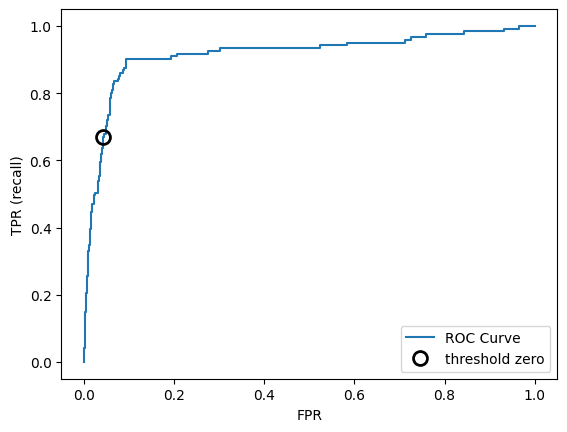

In [58]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# Знаходимо поріг найбижче до нуля
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

Ідеальна ROC-крива проходить через верхній лівий кут, відповідаючи класифікатору, що дає високе значення повноти при низькій частці помилково позитивних прикладів. Проаналізувавши значення повноти та FPR для порога за умовчанням `0`, ми бачимо, що можемо досягти набагато вищого значення повноти (близько `0.9`) лише за незначному збільшенні FPR. Точка, найближче розташована до лівого верхнього кута, можливо, буде кращою робочою точкою, ніж та, що обрана за замовчуванням. Знову ж таки, майте на увазі, що для вибору порогового значення слід використовувати окремий перевірочний набір, а не тестові дані.

На рисунку ви можете порівняти випадковий ліс та SVM за допомогою ROC-кривих.

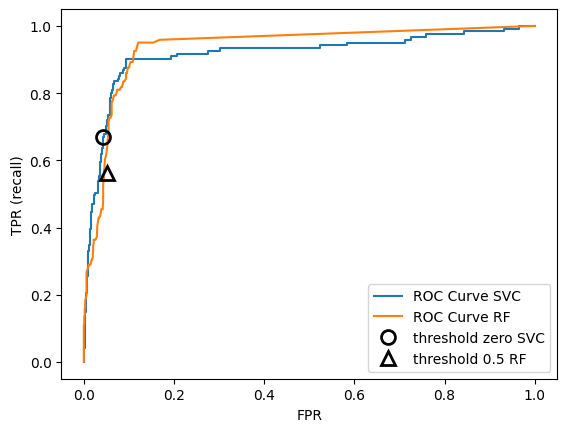

In [59]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label="ROC Curve SVC")
plt.plot(fpr_rf, tpr_rf, label="ROC Curve RF")

plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero SVC", fillstyle="none", c='k', mew=2)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], '^', markersize=10,
         label="threshold 0.5 RF", fillstyle="none", c='k', mew=2)

plt.legend(loc=4)

Як і у випадку з кривою влучності-повноти, ми хочемо підсумувати інформацію ROC-кривою за допомогою одного числа, площі під кривою (зазвичай її просто називають **AUC**, при цьому майте на увазі, що йдеться про ROC-криву). Ми можемо обчислити площу під ROC-кривою за допомогою функції `roc_auc_score`.

In [60]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print("AUC for Random Forest: {:.3f}".format(rf_auc))
print("AUC for SVC: {:.3f}".format(svc_auc))

AUC for Random Forest: 0.937
AUC for SVC: 0.916


Порівнявши випадковий ліс та SVM за допомогою AUC, ми можемо зробити висновок, що випадковий ліс дає трохи кращу якість моделі, ніж SVM. Нагадаємо, оскільки середня точність – це площа під кривою, яка набуває значення від `0` до `1`, середня точність завжди повертає значення від `0` (найгірше значення) до `1` (краще значення).

Випадковий класифікатор відповідає значенню AUC `0.5` незалежно від того, як збалансовані класи в наборі даних. Тому метрика AUC є більш оптимальною, ніж правильність під час вирішення завдань незбалансованої класифікації. AUC можна інтерпретувати як міру якості ранжирування позитивних прикладів. Значення площі під кривою еквівалентно ймовірності того, що згідно з побудованою моделі випадково обраний приклад позитивного класу буде мати більш високий бал, ніж випадково обраний приклад негативного класу.

Таким чином, ідеальне значення AUC, що дорівнює `1`, означає, що всі позитивні приклади, на відміну від негативних, мають більш високий бал. У задачах незбалансованої класифікації застосування AUC для відбору моделі найчастіше є більш доцільним, ніж використання правильності.

Повернемося до завдання, яке ми вирішували раніше, класифікуючи в наборі `digits` дев'ятки та інші цифри. Ми класифікуємо спостереження, використовуючи SVM з трьома різними налаштуваннями ширини ядра та `gamma`.

gamma = 1.00  accuracy = 0.90  AUC = 0.50
gamma = 0.05  accuracy = 0.90  AUC = 1.00
gamma = 0.01  accuracy = 0.90  AUC = 1.00


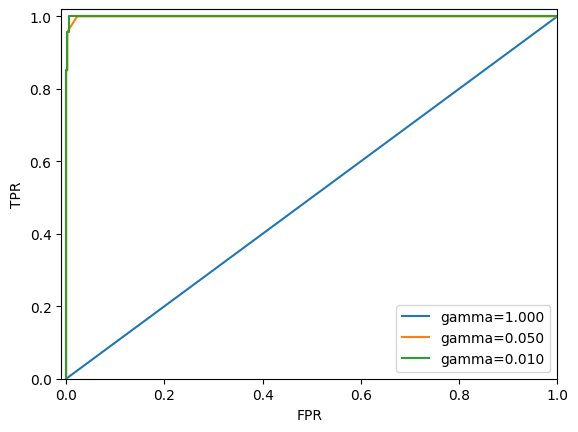

In [61]:
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, y, random_state=0)

plt.figure()

for gamma in [1, 0.05, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test , svc.decision_function(X_test))
    print("gamma = {:.2f}  accuracy = {:.2f}  AUC = {:.2f}".format(
          gamma, accuracy, auc))
    plt.plot(fpr, tpr, label="gamma={:.3f}".format(gamma))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")

Правильність при використанні різних значень `gamma` залишається однаковою та становить 90%. Однакове значення правильності може бути випадковістю, а може бути ні. Однак, глянувши на AUC і відповідну криву, ми бачимо чітку різницю між цими трьома моделями. При `gamma=1.0` значення AUC фактично відповідає випадковому класифікатору (випадкового результату `decision_function`). При `gamma=0.05` якість моделі різко підвищується. І, нарешті, при `gamma=0.01` ми отримаємо ідеальне значення AUC, що дорівнює `1.0`. Це означає, що відповідно до вирішальної функції всі позитивні приклади отримують більш високий бал, ніж усі негативні приклади.

Іншими словами, за допомогою правильного граничного значення ця модель може ідеально класифікувати дані! Знаючи це, ми можемо скоригувати граничне значення для цієї моделі та отримати правильні прогнози. Якби ми використовували лише одну точність, ми не мали б цієї інформації.

З цієї причини рекомендується використовувати AUC для оцінки якості моделей на незбалансованих даних. Однак майте на увазі, що в AUC не використовується стандартний поріг, таким чином, щоб на основі моделі з високим значенням AUC отримати корисний класифікатор, можливо, буде потрібно коригування порогового значення.

### Використання метрики оцінки для вибору моделі

Ми детально розглянули багато методів оцінки та обговорили їх застосування з урахуванням фактичних та спрогнозованих результатів.

Однак, часто нам потрібно скористатися метриками типу AUC для відбору моделі, що виконується на основі `GridSearchCV` або `cross_val_score`. На щастя, `scikit-learn` пропонує дуже простий спосіб вирішення цього завдання за допомогою аргументу `scoring`, який можна використовувати як `GridSearchCV`, так і `cross_val_score`.

Ви можете просто встановити рядок з описом необхідної метрики оцінки. Припустимо, ми хочемо оцінити якість класифікатора SVM під час вирішення завдання «дев'ять проти інших» для набору даних `digits`, використовуючи значення AUC. Щоб змінити метрику оцінки з правильності, встановленої за умовчанням, на AUC, достатньо вказати "`roc_auc`" як параметр `scoring`.

In [62]:
# За замовчуванням для оцінки якості моделі використовується правильність
print("Default scoring: {}".format(
    cross_val_score(SVC(), digits.data, digits.target == 9, cv=5)))

# При вказанні значення scoring="accuracy" результати не змінюються
explicit_accuracy =  cross_val_score(SVC(), digits.data, digits.target == 9,
                                     scoring="accuracy", cv=5)
print("Explicit accuracy scoring: {}".format(explicit_accuracy))

roc_auc =  cross_val_score(SVC(), digits.data, digits.target == 9,
                           scoring="roc_auc", cv=5)
print("AUC scoring: {}".format(roc_auc))

Default scoring: [0.975      0.99166667 1.         0.99442897 0.98050139]
Explicit accuracy scoring: [0.975      0.99166667 1.         0.99442897 0.98050139]
AUC scoring: [0.99717078 0.99854252 1.         0.999828   0.98400413]


In [63]:
res = cross_validate(SVC(), digits.data, digits.target == 9,
                     scoring=["accuracy", "roc_auc", "recall_macro"],
                     return_train_score=True, cv=5)
display(pd.DataFrame(res))

,fit_time,score_time,test_accuracy,train_accuracy,test_roc_auc,train_roc_auc,test_recall_macro,train_recall_macro
0,0.015989,0.032013,0.975000,0.994433,0.997171,0.998679,0.887346,0.972222
1,0.023982,0.015996,0.991667,0.995825,0.998543,0.999141,0.958333,0.982252
2,0.023946,0.024022,1.000000,0.995132,1.000000,0.998975,1.000000,0.978780
3,0.015978,0.015991,0.994429,0.995828,0.999828,0.998825,0.972222,0.982252
4,0.015949,0.023987,0.980501,0.996523,0.984004,0.999914,0.902778,0.985725


Так само ми можемо змінити метрику, яка використовується для відбору найкращих параметрів у `Grid-SearchCV`:

In [64]:
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target == 9, random_state=0)

# задаємо погану сітку для ілюстрації
param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}

# Використовуємо точність для оцінки моделі
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)
print("Grid-Search with accuracy")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (accuracy)): {:.3f}".format(grid.best_score_))
print("Test set AUC: {:.3f}".format(
    roc_auc_score(y_test, grid.decision_function(X_test))))
print("Test set accuracy: {:.3f}".format(grid.score(X_test, y_test)))

Grid-Search with accuracy
Best parameters: {'gamma': 0.0001}
Best cross-validation score (accuracy)): 0.976
Test set AUC: 0.992
Test set accuracy: 0.973


In [65]:
# Використовуємо AUC у якості метрики
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring="roc_auc")
grid.fit(X_train, y_train)
print("\nGrid-Search with AUC")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (AUC): {:.3f}".format(grid.best_score_))
print("Test set AUC: {:.3f}".format(
    roc_auc_score(y_test, grid.decision_function(X_test))))
print("Test set accuracy: {:.3f}".format(grid.score(X_test, y_test)))


Grid-Search with AUC
Best parameters: {'gamma': 0.01}
Best cross-validation score (AUC): 0.998
Test set AUC: 1.000
Test set accuracy: 1.000


Коли використовувалася правильність, був вибраний параметр `gamma=0.0001`, тоді як при використанні AUC було обрано `gamma=0.01`. В обох випадках правильність перехресної перевірки відповідає правильності тестового набору. Однак використання AUC дозволило знайти налаштування параметра, оптимальне з точки зору AUC і навіть з точки зору правильності.

Найбільш важливими значеннями параметра `scoring` для класифікації є `accuracy` (за замовчуванням), `roc_auc` для площі під ROC-кривою, `average_precision` (площа під кривою точності-повноти), `f1`, `f1_macro`, `f1_micro` і `f1_weighted` для бінарної f1-міри та різних стратегій усереднення.

Для регресії найчастіше використовуваними значеннями є `r2` для $R^2$, `​​mean_squared_error` для середньоквадратичної помилки і `mean_absolute_error` для середньої абсолютної помилки. Повний список підтримуваних аргументів ви можете знайти, ознайомившись із документацією або поглянувши на словник `SCORERS` у модулі `metrics.scorer`.

In [66]:
from sklearn.metrics import SCORERS
print("Available scorers:")
print(sorted(SCORERS.keys()))

Available scorers:
['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted',